# spectra letg hrc-i

there is only 1!


In [1]:
# source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
download_chandra_obsid 1801 evt1,flt,asol
mv -fv 1801/*/*fits.gz .
gunzip -f *.fits.gz
rmdir 1801/*
rmdir 1801


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       29 Mb  ####################          < 1 s  58119.6 kb/s
  asol     fits        3 Mb  ####################          < 1 s  54388.8 kb/s
  flt      fits        3 Kb  ####################          < 1 s  271.1 kb/s

      Total download size for ObsId 1801 = 32 Mb
      Total download time for ObsId 1801 = < 1 s

'1801/primary/pcadf01801_000N001_asol1.fits.gz' -> './pcadf01801_000N001_asol1.fits.gz'
'1801/secondary/hrcf01801_000N008_evt1.fits.gz' -> './hrcf01801_000N008_evt1.fits.gz'
'1801/secondary/hrcf01801_000N008_std_flt1.fits.gz' -> './hrcf01801_000N008_std_flt1.fits.gz'


## L1.5

### detect

In [3]:
pset tgdetect infile=hrcf01801_000N008_evt1.fits
pset tgdetect outfile=hrc_1801_evt1_src1a.fits
tgdetect mode=h clobber=yes


[1] 15516
[1]+  Done                    ds9 hrcf01801_000N008_evt1.fits -scale log -zoom 2 -region hrc_1801_evt1_src1a.fits -saveimage png ds9_01.png


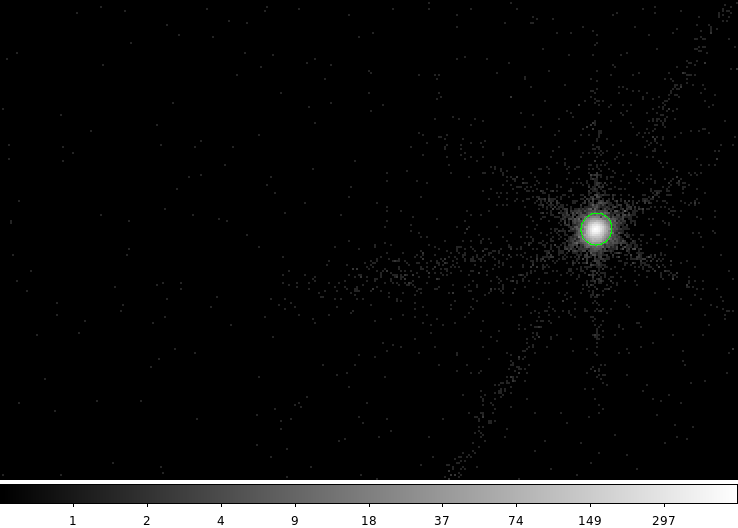

In [4]:
ds9 hrcf01801_000N008_evt1.fits  -scale log -zoom 2\
  -region hrc_1801_evt1_src1a.fits \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

### tg mask

In [5]:
pset tg_create_mask infile=hrcf01801_000N008_evt1.fits
pset tg_create_mask outfile=hrc_1801_evt1_L1a.fits
pset tg_create_mask input_pos_tab=hrc_1801_evt1_src1a.fits
tg_create_mask mode=h clob+


[1] 15577
[1]+  Done                    ds9 hrcf01801_000N008_evt1.fits -bin factor 32 -scale log -region hrc_1801_evt1_L1a.fits -saveimage png ds9_02.png


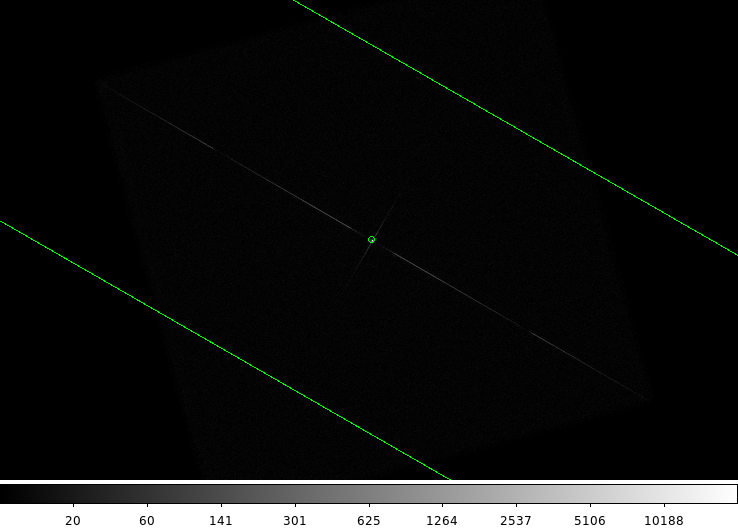

In [6]:
ds9 hrcf01801_000N008_evt1.fits  -bin factor 32 -scale log \
  -region hrc_1801_evt1_L1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [7]:
pset tg_resolve_events infile=hrcf01801_000N008_evt1.fits
pset tg_resolve_events outfile=hrc_1801_evt1a.fits
pset tg_resolve_events regionfile=hrc_1801_evt1_L1a.fits
pset tg_resolve_events acaofffile=pcadf01801_000N001_asol1.fits
pset tg_resolve_events eventdef=")stdlev1_HRC"
pset tg_resolve_events osipfile=none
tg_resolve_events mo=h cl+

## Create L2

### status

In [8]:
 dmcopy "hrc_1801_evt1a.fits[status=xxxxxx00xxxx0xxx00000000x0000000]" \
      hrc_1801_flt1_evt1a.fits opt=all clob+


### gti

In [9]:
dmcopy \
      "hrc_1801_flt1_evt1a.fits[EVENTS][@hrcf01801_000N008_std_flt1.fits]" \
      hrc_1801_evt2.fits opt="" clob+


In [10]:
 dmappend \
      "hrc_1801_flt1_evt1a.fits[region][subspace -time]" \
      hrc_1801_evt2.fits

## Extract spectrum

In [11]:
pset tgextract infile=hrc_1801_evt2.fits
pset tgextract outfile=hrc_1801_pha2.fits
tgextract mode=h clob+


In [12]:
dmlist hrc_1801_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: hrc_1801_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 2        rows
Block    3: REGION                         Table        10 cols x 6        rows


In [13]:
dmlist hrc_1801_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[16384]                

# Cleanup

In [14]:
/bin/rm -f hrcf* pcadf*
